In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [0]:
def distance(u,v,rows,cols):
  return math.sqrt((u-rows/2)**2 + (v-cols/2) ** 2)

In [0]:
img = cv2.imread('Aravos.jpg',0)
rows, cols = img.shape

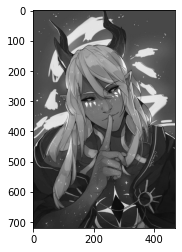

In [4]:
plt.imshow(img, cmap='gray')

In [0]:
def get_ILFF(D0):
  ILFF = np.zeros((rows, cols), np.float32)
  for x in range(rows):
    for y in range(cols):
      if distance(x,y,rows,cols) <= D0:
        ILFF[x][y] = 1
  return ILFF

In [0]:
def get_IHFF(D0):
  IHFF = np.zeros((rows, cols), np.float32)
  for x in range(rows):
    for y in range(cols):
      if distance(x,y,rows,cols) > D0:
        IHFF[x][y] = 1
  return IHFF

In [0]:
def get_BLFF(D0,n):
  BLFF = np.zeros((rows, cols), np.float32)
  for x in range(rows):
    for y in range(cols):
      BLFF[x][y] = 1/(1+(distance(x,y,rows,cols)/D0)**(2*n))
  return BLFF

In [0]:
def get_BHFF(D0,n):
  BHFF = np.ones((rows, cols), np.float32)
  for x in range(rows):
    for y in range(cols):
      BHFF[x][y] = 1 - 1/(1+(distance(x,y,rows,cols)/D0)**(2*n))
  return BHFF

In [0]:
def get_GLFF(D0):
  GLFF = np.zeros((rows, cols), np.float32)
  for x in range(rows):
    for y in range(cols):
      d = D0 ** 2
      d = d * 2
      GLFF[x][y] = math.exp((-1*distance(x,y,rows,cols)**2)/d)
  return GLFF

In [0]:
def get_GHFF(D0):
  GHFF = np.ones((rows, cols), np.float32)
  for x in range(rows):
    for y in range(cols):
      d = D0 ** 2
      d = d * 2
      GHFF[x][y] = 1 - math.exp((-1*distance(x,y,rows,cols)**2)/d)
  return GHFF

In [0]:
def spectrum(img):
  fft = np.fft.fft2(img)
  fft_shift = np.fft.fftshift(fft)
  return fft_shift

In [0]:
def print_spectrum(img):
  magnitude_spectrum = np.abs(img) ** 0.1
  plt.imshow(magnitude_spectrum, cmap = 'gray')

In [0]:
def print_img(img):
  filtered_img = np.abs(img)
  filtered_img -= filtered_img.min()
  filtered_img = filtered_img*255 / filtered_img.max()
  filtered_img = filtered_img.astype(np.uint8)
  plt.imshow(filtered_img, cmap = 'gray')
  return filtered_img

In [0]:
def change_spectrum(img,mask):
  fshift = img*mask
  f_ishift = np.fft.ifftshift(fshift)
  img_back = np.fft.ifft2(f_ishift)
  return fshift, img_back

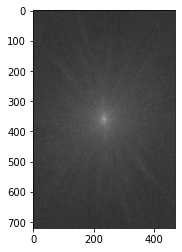

In [15]:
sp = spectrum(img)
print_spectrum(sp)

In [0]:
D = 20
n = 2

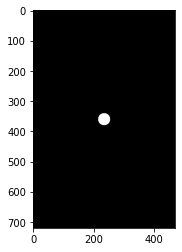

In [17]:
ILFF = get_ILFF(D)
print_spectrum(ILFF)

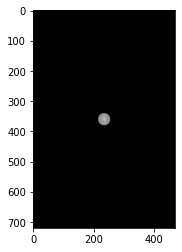

In [18]:
spc,img_back = change_spectrum(sp,ILFF)
print_spectrum(spc)

True

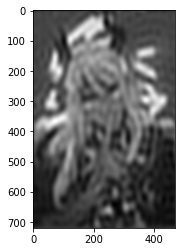

In [19]:
cv2.imwrite('Aravos_ILFF.jpg', print_img(img_back))

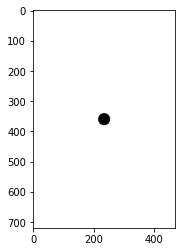

In [20]:
IHFF = get_IHFF(D)
print_spectrum(IHFF)

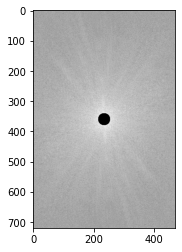

In [21]:
spc,img_back = change_spectrum(sp,IHFF)
print_spectrum(spc)

True

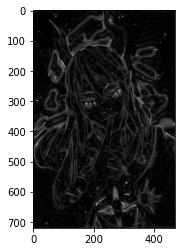

In [22]:
cv2.imwrite('Aravos_IHFF.jpg', print_img(img_back))

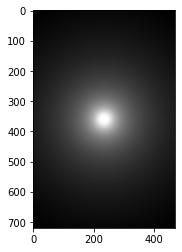

In [23]:
BLFF = get_BLFF(D,n)
print_spectrum(BLFF)

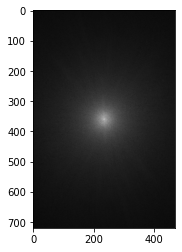

In [24]:
spc,img_back = change_spectrum(sp,BLFF)
print_spectrum(spc)

True

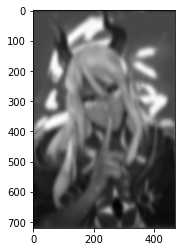

In [25]:
cv2.imwrite('Aravos_BLFF.jpg', print_img(img_back))

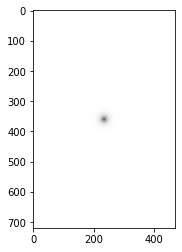

In [26]:
BHFF = get_BHFF(D,n)
print_spectrum(BHFF)

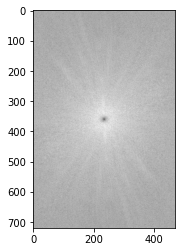

In [27]:
spc,img_back = change_spectrum(sp,BHFF)
print_spectrum(spc)

True

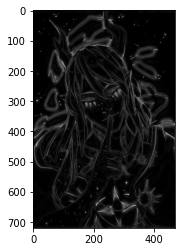

In [28]:
cv2.imwrite('Aravos_BHFF.jpg', print_img(img_back))

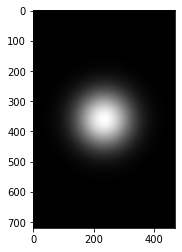

In [29]:
GLFF = get_GLFF(D)
print_spectrum(GLFF)

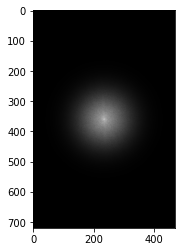

In [30]:
spc,img_back = change_spectrum(sp,GLFF)
print_spectrum(spc)

True

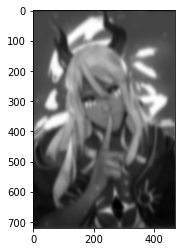

In [31]:
cv2.imwrite('Aravos_GLFF.jpg', print_img(img_back))

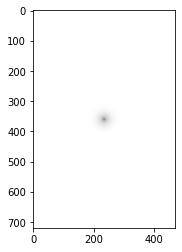

In [32]:
GHFF = get_GHFF(D)
print_spectrum(GHFF)

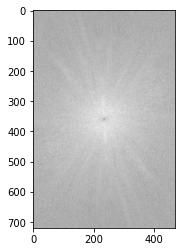

In [33]:
spc,img_back = change_spectrum(sp,GHFF)
print_spectrum(spc)

True

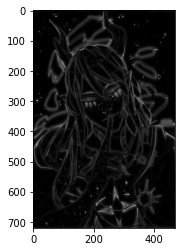

In [34]:
cv2.imwrite('Aravos_GHFF.jpg', print_img(img_back))